In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
data = pd.read_csv('/content/WineQT.csv')

print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [91]:
# Data Preprocessing

bins = [2, 5, 7, 9] # Low (3-5), Medium (6-7), High (8-9)

data['quality_category'] = pd.cut(data['quality'], bins=bins, labels=[0, 1, 2])

data.drop(columns=['quality'], inplace=True)

print(data['quality_category'].value_counts())

quality_category
1    605
0    522
2     16
Name: count, dtype: int64


In [77]:
# Feature Scaling & Train-Test Split

X = data.drop(columns=['quality_category']) # features (X)
y = data['quality_category'] # variable (y)


# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [78]:
# Train a Random Forest Classifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Predicted wine quality categories:", y_pred[:10])  # Show first 10 predictions

Predicted wine quality categories: [1 1 1 0 0 1 0 0 1 1]


In [79]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification report to check performance for each category
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.79      0.86      0.82       121
           2       1.00      0.33      0.50         3

    accuracy                           0.80       229
   macro avg       0.87      0.65      0.70       229
weighted avg       0.81      0.80      0.80       229



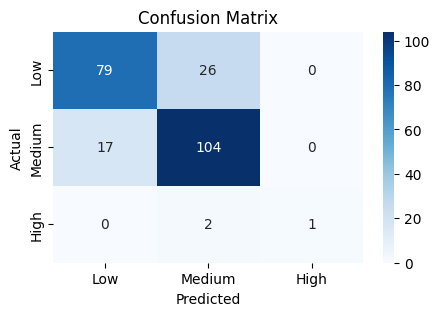

In [70]:
# Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
